<a href="https://www.kaggle.com/code/aabdollahii/prostate-cancer-90-acc?scriptVersionId=254370130" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Reading Data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
df = pd.read_csv("/kaggle/input/prostate-cancer-risk-and-lifestyle-synthetic-dataset/synthetic_prostate_cancer_risk.csv")

import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress only UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Get some basic Information about data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   bmi                      1000 non-null   float64
 3   smoker                   1000 non-null   object 
 4   alcohol_consumption      605 non-null    object 
 5   diet_type                1000 non-null   object 
 6   physical_activity_level  1000 non-null   object 
 7   family_history           1000 non-null   object 
 8   mental_stress_level      1000 non-null   object 
 9   sleep_hours              1000 non-null   float64
 10  regular_health_checkup   1000 non-null   object 
 11  prostate_exam_done       1000 non-null   object 
 12  risk_level               1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


- no null value execpt alcohol_consumption all this is a good news
- a lot of column with object type. We need to encode all of them before modeling. 

In [3]:
#always show all of the columns 
pd.set_option('display.max_columns', None)
df.head(20)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,1,39,24.7,No,NaN,Fatty,Moderate,No,High,5.6,No,No,Medium
1,2,43,25.6,Yes,NaN,Mixed,High,No,High,6.9,Yes,No,Low
2,3,72,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low
3,4,60,25.6,Yes,NaN,Fatty,Moderate,No,High,5.6,Yes,No,Medium
4,5,51,26.6,Yes,NaN,Mixed,Low,No,Medium,5.9,No,No,Medium
5,6,68,29.4,Yes,Moderate,Mixed,Moderate,Yes,Medium,8.3,No,No,Medium
6,7,39,24.4,Yes,NaN,Mixed,Moderate,No,High,6.0,No,No,Low
7,8,67,25.1,Yes,High,Fatty,High,No,High,6.4,No,No,High
8,9,58,20.6,Yes,Moderate,Healthy,High,No,Medium,8.3,No,No,Medium
9,10,78,26.9,Yes,Moderate,Healthy,Moderate,No,High,8.3,No,No,Medium


# Handle null-values

In [4]:
#only this column has missing value
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('unknown')


In [5]:
# Count the number of NaNs in the 'alcohol_consumption' column
num_nulls = df['alcohol_consumption'].isnull().sum()
print(f"Number of null values in 'alcohol_consumption': {num_nulls}")


Number of null values in 'alcohol_consumption': 0


In [6]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])


Series([], dtype: int64)


- Here we gooo. We are done with null values.Now lets encode all we have

# Encoding Categorical Data

In [7]:
df.head(20)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,1,39,24.7,No,unknown,Fatty,Moderate,No,High,5.6,No,No,Medium
1,2,43,25.6,Yes,unknown,Mixed,High,No,High,6.9,Yes,No,Low
2,3,72,22.4,No,Moderate,Mixed,Moderate,No,High,7.8,Yes,No,Low
3,4,60,25.6,Yes,unknown,Fatty,Moderate,No,High,5.6,Yes,No,Medium
4,5,51,26.6,Yes,unknown,Mixed,Low,No,Medium,5.9,No,No,Medium
5,6,68,29.4,Yes,Moderate,Mixed,Moderate,Yes,Medium,8.3,No,No,Medium
6,7,39,24.4,Yes,unknown,Mixed,Moderate,No,High,6.0,No,No,Low
7,8,67,25.1,Yes,High,Fatty,High,No,High,6.4,No,No,High
8,9,58,20.6,Yes,Moderate,Healthy,High,No,Medium,8.3,No,No,Medium
9,10,78,26.9,Yes,Moderate,Healthy,Moderate,No,High,8.3,No,No,Medium


In [8]:
# --- Binary Encoding (Yes/No) ---
binary_map = {'Yes': 1, 'No': 0}
df['smoker'] = df['smoker'].map(binary_map)
df['family_history'] = df['family_history'].map(binary_map)
df['regular_health_checkup'] = df['regular_health_checkup'].map(binary_map)
df['prostate_exam_done'] = df['prostate_exam_done'].map(binary_map)

# --- Ordinal Encoding (Yes/No) ---
alcohol_map = {'Low': 0, 'Moderate': 1, 'High': 2, 'unknown': -1}
df['alcohol_consumption'] = df['alcohol_consumption'].map(alcohol_map)

df['diet_type'] = df['diet_type'].map({'Healthy':0, 'Mixed':1, 'Fatty':2})


activity_map = {'Low': 0, 'Moderate': 1, 'High': 2}
df['physical_activity_level'] = df['physical_activity_level'].map(activity_map)

stress_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['mental_stress_level'] = df['mental_stress_level'].map(stress_map)

risk_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['risk_level'] = df['risk_level'].map(risk_map)



- I used map function becuase all of the categorical function have a order

In [9]:
df.head(10)

,id,age,bmi,smoker,alcohol_consumption,diet_type,physical_activity_level,family_history,mental_stress_level,sleep_hours,regular_health_checkup,prostate_exam_done,risk_level
0,1,39,24.7,0,-1,2,1,0,2,5.6,0,0,1
1,2,43,25.6,1,-1,1,2,0,2,6.9,1,0,0
2,3,72,22.4,0,1,1,1,0,2,7.8,1,0,0
3,4,60,25.6,1,-1,2,1,0,2,5.6,1,0,1
4,5,51,26.6,1,-1,1,0,0,1,5.9,0,0,1
5,6,68,29.4,1,1,1,1,1,1,8.3,0,0,1
6,7,39,24.4,1,-1,1,1,0,2,6.0,0,0,0
7,8,67,25.1,1,2,2,2,0,2,6.4,0,0,2
8,9,58,20.6,1,1,0,2,0,1,8.3,0,0,1
9,10,78,26.9,1,1,0,1,0,2,8.3,0,0,1


# Outlier detection

In [10]:
#ai-gen-code

numeric_cols = ['age', 'bmi', 'sleep_hours']

def detect_outliers_iqr(df, columns, k=1.5):
    outlier_mask = pd.DataFrame(False, index=df.index, columns=columns)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        outlier_mask[col] = (df[col] < lower) | (df[col] > upper)
    return outlier_mask

# Detecting outliers
outlier_mask = detect_outliers_iqr(df, numeric_cols)

# Display outlier count per column
print("Outlier count per column:", outlier_mask.sum())

Outlier count per column: age            0
bmi            6
sleep_hours    0
dtype: int64


- only 6 outlier detected we can do Stdscaling

# Scaling data and drop ID

In [11]:
df = df.drop('id', axis = 1)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame. Use df.columns and df.index from the original!
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

# Now .head() will work!
print(df_scaled.head(10))


        age       bmi    smoker  alcohol_consumption  diet_type  \
0 -1.122706 -0.432797 -1.026347            -1.178936   1.347321   
1 -0.844791 -0.133881  0.974329            -1.178936   0.073861   
2  1.170090 -1.196693 -1.026347             0.504056   0.073861   
3  0.336346 -0.133881  0.974329            -1.178936   1.347321   
4 -0.288962  0.198248  0.974329            -1.178936   0.073861   
5  0.892176  1.128208  0.974329             0.504056   0.073861   
6 -1.122706 -0.532436  0.974329            -1.178936   0.073861   
7  0.822697 -0.299945  0.974329             1.345552   1.347321   
8  0.197389 -1.794525  0.974329             0.504056  -1.199600   
9  1.586962  0.297886  0.974329             0.504056  -1.199600   

   physical_activity_level  family_history  mental_stress_level  sleep_hours  \
0                 0.049392       -0.478018             1.293554    -0.852466   
1                 1.315845       -0.478018             1.293554     0.132168   
2                 0.04

# Eda

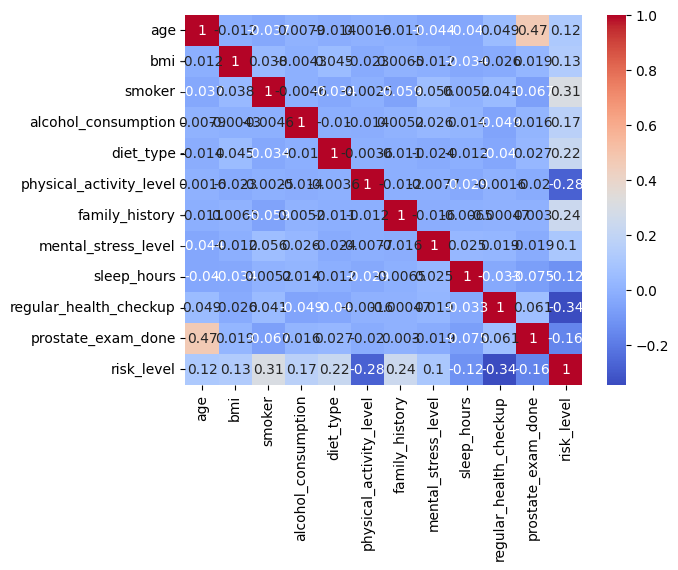

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()


* Strongest positive correlation:
smoker (0.31): Suggests a moderate, positive relationship between smoking and prostate cancer risk.
diet_type (0.22) and alcohol_consumption (0.17): Less strong, but point to possible lifestyle impacts.
* Negative correlation:
physical_activity_level (-0.28): More physical activity is associated with a lower risk level.
regular_health_checkup (-0.16): Regular checkups associate with lower risk.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


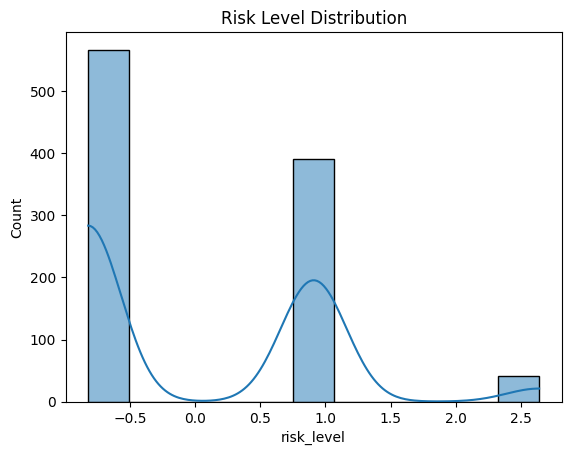

In [14]:
sns.histplot(df_scaled['risk_level'], kde=True)
plt.title("Risk Level Distribution")
plt.show()


* The risk_level variable exhibits a distinctly trimodal distribution, with three clear clusters representing low, medium, and high risk categories. The majority of the dataset falls into the low risk group, while the highest risk group comprises a very small minority. This class imbalance should be considered when building predictive models or interpreting risk factors, as it can bias results and impact the performance of standard machine learning algorithms. Appropriate metrics and sampling strategies should be employed to ensure fair evaluation of model performance, especially for the underrepresented high-risk group.

# model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [16]:
# Round the risk_level back to integers if it was scaled
df["risk_level_class"] = df["risk_level"].round().astype(int)
X = df.drop(["risk_level", "risk_level_class"], axis=1)
y = df["risk_level_class"]



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}


In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("  Classification Report:")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
  Accuracy:  0.8050
  Precision: 0.8193
  Recall:    0.8050
  F1-score:  0.7904
  Confusion Matrix:
[[105  14   0]
 [ 15  55   0]
 [  0  10   1]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       119
           1       0.70      0.79      0.74        70
           2       1.00      0.09      0.17        11

    accuracy                           0.81       200
   macro avg       0.86      0.59      0.59       200
weighted avg       0.82      0.81      0.79       200


Random Forest
  Accuracy:  0.8500
  Precision: 0.8100
  Recall:    0.8500
  F1-score:  0.8282
  Confusion Matrix:
[[109  10   0]
 [  9  61   0]
 [  0  11   0]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       119
           1       0.74      0.87      0.80        70
           2       0.00      0.00      0.00        11

    accuracy           

* Multiple classifiers were evaluated for predicting the risk_level in our dataset, including Logistic Regression, Random Forest, Gradient Boosting, SVM, KNN, and Naive Bayes. While ensemble models (Random Forest, Gradient Boosting) achieved the highest overall accuracy (up to 0.90) and weighted F1-scores (~0.87), all models struggled to correctly identify the minority (high risk, class 2) cases. This is evident from the extremely low recall for class 2 (as low as 0.00 for most methods; max recall achieved was 0.09).